<a href="https://colab.research.google.com/github/sanil72900/COGS118B_Final/blob/main/Cogs118BSocialGroups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
import sklearn.cluster as cluster
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn import mixture
from scipy import stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/Shareddrives/Cogs 118B Project/Data/wine.data', header = None)
data.columns = ['Class_Identifier', 'Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 'Total_Phenols', 'Flavanoids', 
                'Nonflavanoid_Phenols', 'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280/OD315', 'Proline']

In [ ]:
data

,Class_Identifier,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


'Class_Identifier' is our "label" for the clusters. In other words, we have 3 clusters in this dataset. At the end of K-means we should have 71 in cluster 2, 59 in cluster 1 etc. 

Keeping this here for our reference:

In [ ]:
data['Class_Identifier'].value_counts()

2    71
1    59
3    48
Name: Class_Identifier, dtype: int64

Decided to look at the distribution of the data as a whole, and each 'supposed' cluster individually. Can compare statistics about each feature. 

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Class_Identifier,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [ ]:
data[data['Class_Identifier'] == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
Class_Identifier,59.0,1.000000,0.000000,1.00,1.000,1.00,1.000,1.00
Alcohol,59.0,13.744746,0.462125,12.85,13.400,13.75,14.100,14.83
Malic_Acid,59.0,2.010678,0.688549,1.35,1.665,1.77,1.935,4.04
Ash,59.0,2.455593,0.227166,2.04,2.295,2.44,2.615,3.22
Ash_Alcanity,59.0,17.037288,2.546322,11.20,16.000,16.80,18.700,25.00
Magnesium,59.0,106.338983,10.498949,89.00,98.000,104.00,114.000,132.00
Total_Phenols,59.0,2.840169,0.338961,2.20,2.600,2.80,3.000,3.88
Flavanoids,59.0,2.982373,0.397494,2.19,2.680,2.98,3.245,3.93
Nonflavanoid_Phenols,59.0,0.290000,0.070049,0.17,0.255,0.29,0.320,0.50
Proanthocyanins,59.0,1.899322,0.412109,1.25,1.640,1.87,2.090,2.96


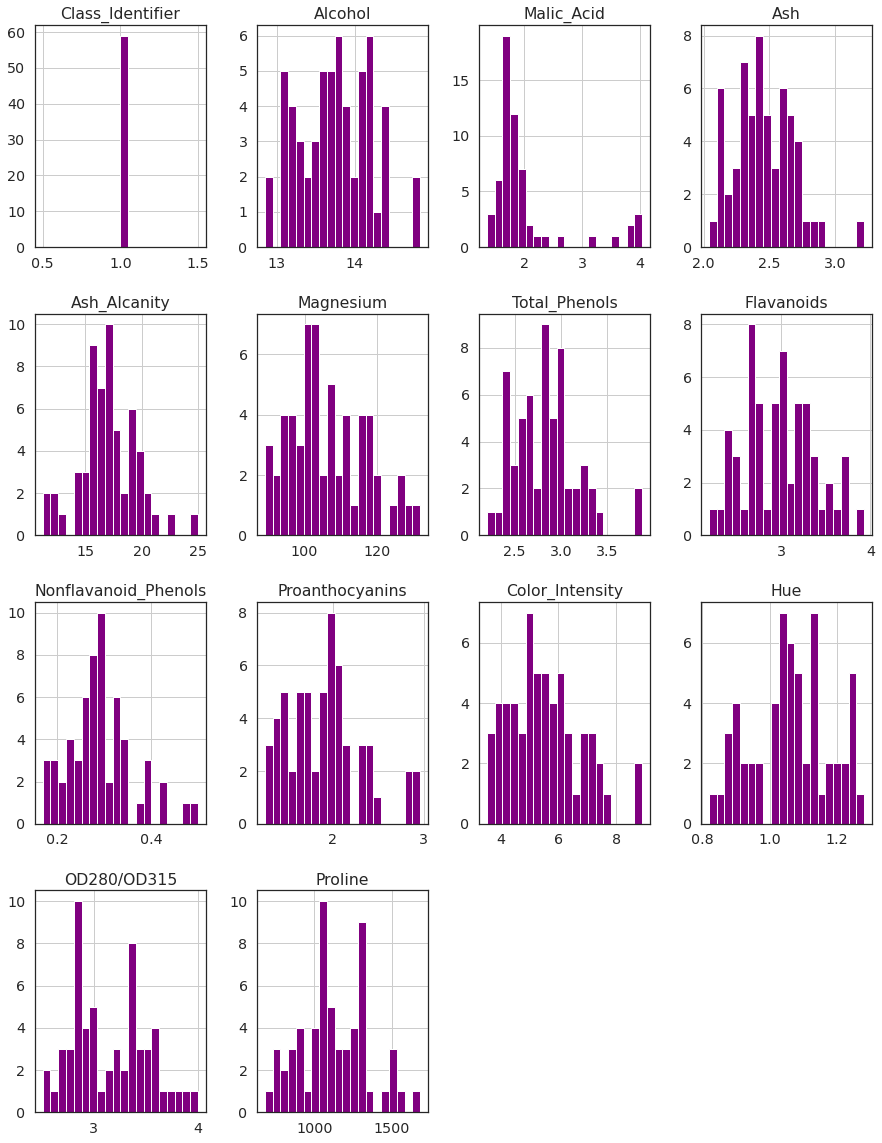

In [ ]:
sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(15,20)})
ax=data[data['Class_Identifier'] == 1].hist(bins=20,color='purple')

In [ ]:
data[data['Class_Identifier'] == 2].describe().T

,count,mean,std,min,25%,50%,75%,max
Class_Identifier,71.0,2.000000,0.000000,2.00,2.000,2.00,2.000,2.00
Alcohol,71.0,12.278732,0.537964,11.03,11.915,12.29,12.515,13.86
Malic_Acid,71.0,1.932676,1.015569,0.74,1.270,1.61,2.145,5.80
Ash,71.0,2.244789,0.315467,1.36,2.000,2.24,2.420,3.23
Ash_Alcanity,71.0,20.238028,3.349770,10.60,18.000,20.00,22.000,30.00
Magnesium,71.0,94.549296,16.753497,70.00,85.500,88.00,99.500,162.00
Total_Phenols,71.0,2.258873,0.545361,1.10,1.895,2.20,2.560,3.52
Flavanoids,71.0,2.080845,0.705701,0.57,1.605,2.03,2.475,5.08
Nonflavanoid_Phenols,71.0,0.363662,0.123961,0.13,0.270,0.37,0.430,0.66
Proanthocyanins,71.0,1.630282,0.602068,0.41,1.350,1.61,1.885,3.58


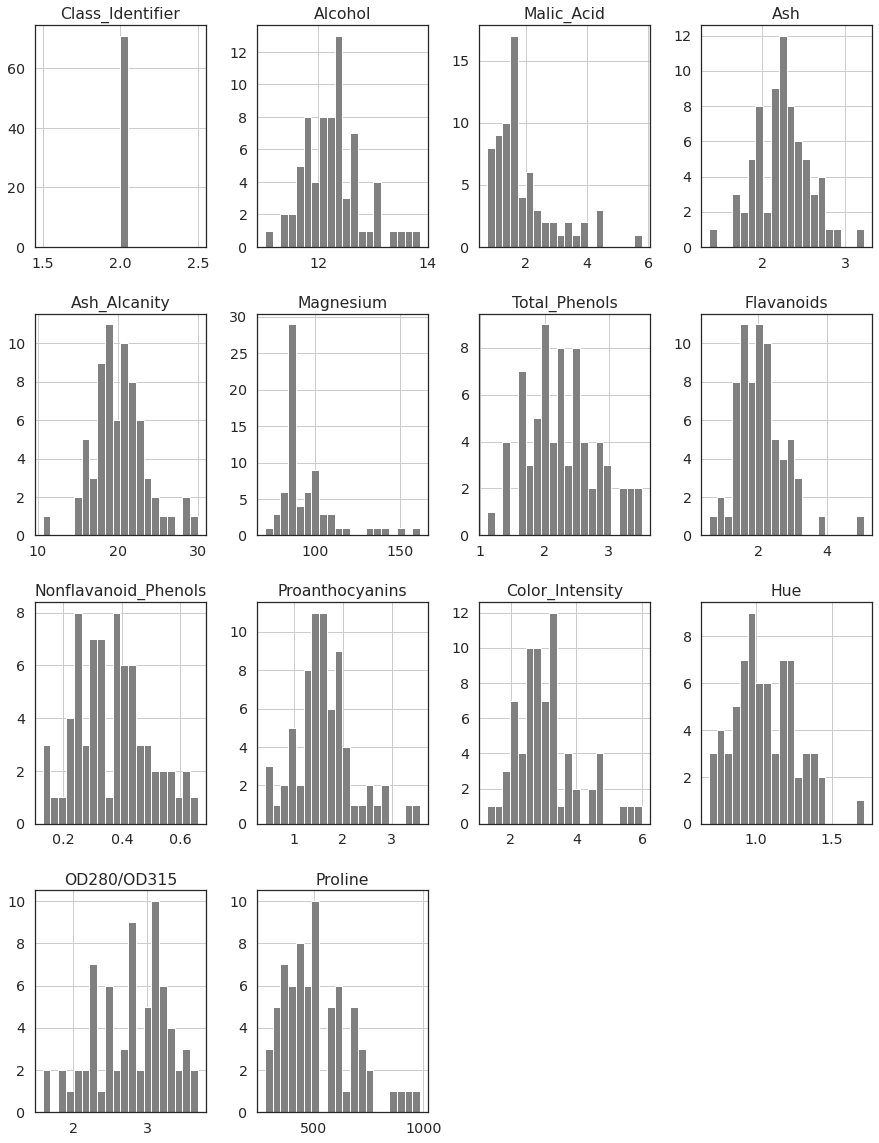

In [ ]:
sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(15,20)})
ax=data[data['Class_Identifier'] == 2].hist(bins=20,color='gray')

In [ ]:
data[data['Class_Identifier'] == 3].describe().T

,count,mean,std,min,25%,50%,75%,max
Class_Identifier,48.0,3.000000,0.000000,3.00,3.0000,3.000,3.0000,3.00
Alcohol,48.0,13.153750,0.530241,12.20,12.8050,13.165,13.5050,14.34
Malic_Acid,48.0,3.333750,1.087906,1.24,2.5875,3.265,3.9575,5.65
Ash,48.0,2.437083,0.184690,2.10,2.3000,2.380,2.6025,2.86
Ash_Alcanity,48.0,21.416667,2.258161,17.50,20.0000,21.000,23.0000,27.00
Magnesium,48.0,99.312500,10.890473,80.00,89.7500,97.000,106.0000,123.00
Total_Phenols,48.0,1.678750,0.356971,0.98,1.4075,1.635,1.8075,2.80
Flavanoids,48.0,0.781458,0.293504,0.34,0.5800,0.685,0.9200,1.57
Nonflavanoid_Phenols,48.0,0.447500,0.124140,0.17,0.3975,0.470,0.5300,0.63
Proanthocyanins,48.0,1.153542,0.408836,0.55,0.8550,1.105,1.3500,2.70


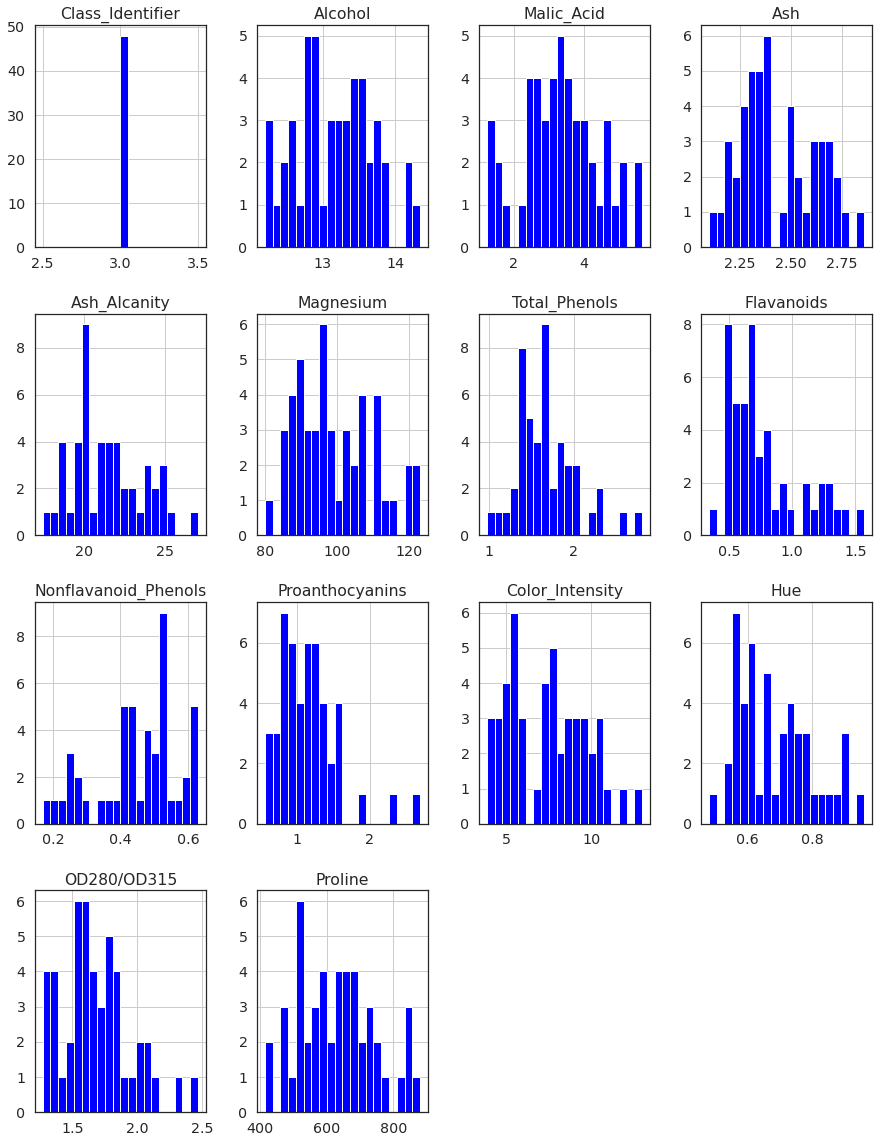

In [ ]:
sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(15,20)})
ax=data[data['Class_Identifier'] == 3].hist(bins=20,color='blue')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Class_Identifier      178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic_Acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Ash_Alcanity          178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total_Phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid_Phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color_Intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD280/OD315           178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


Exploratory Data Analysis


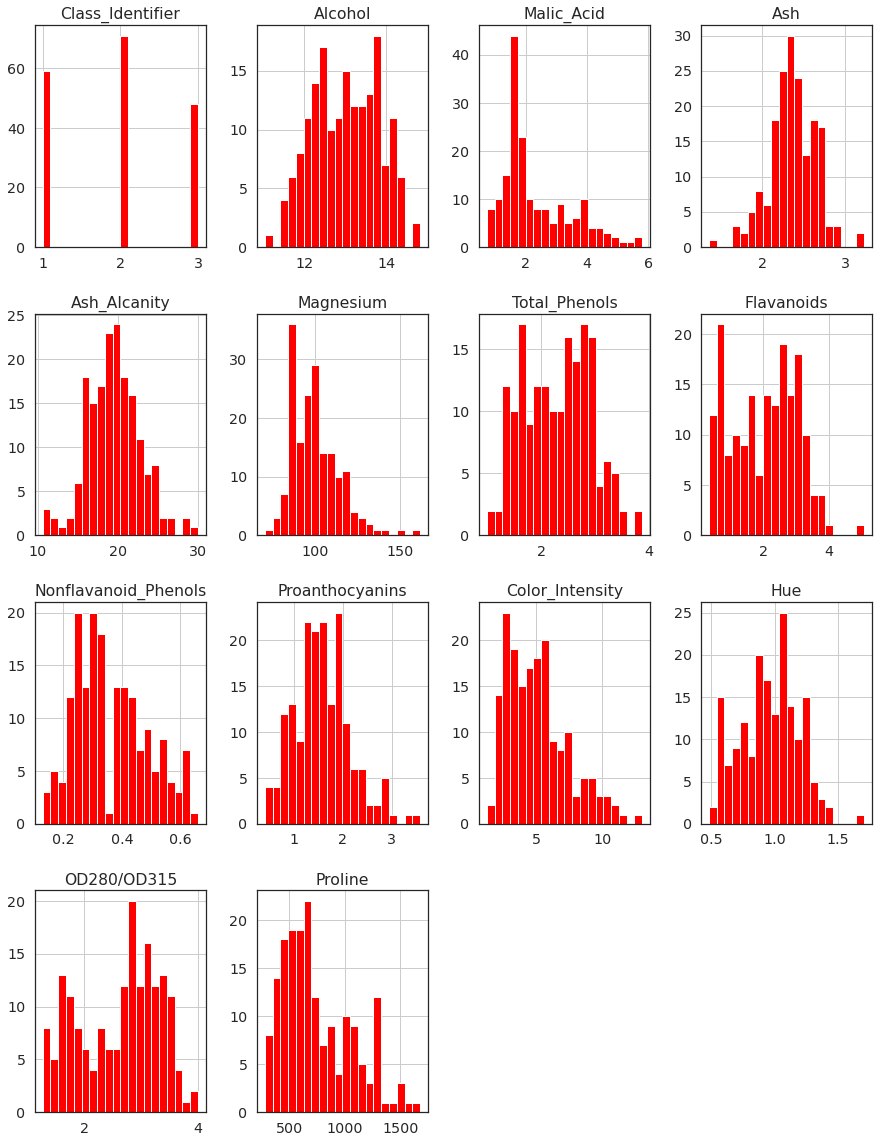

In [ ]:
sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(15,20)})
ax=data.hist(bins=20,color='red')

# New Section

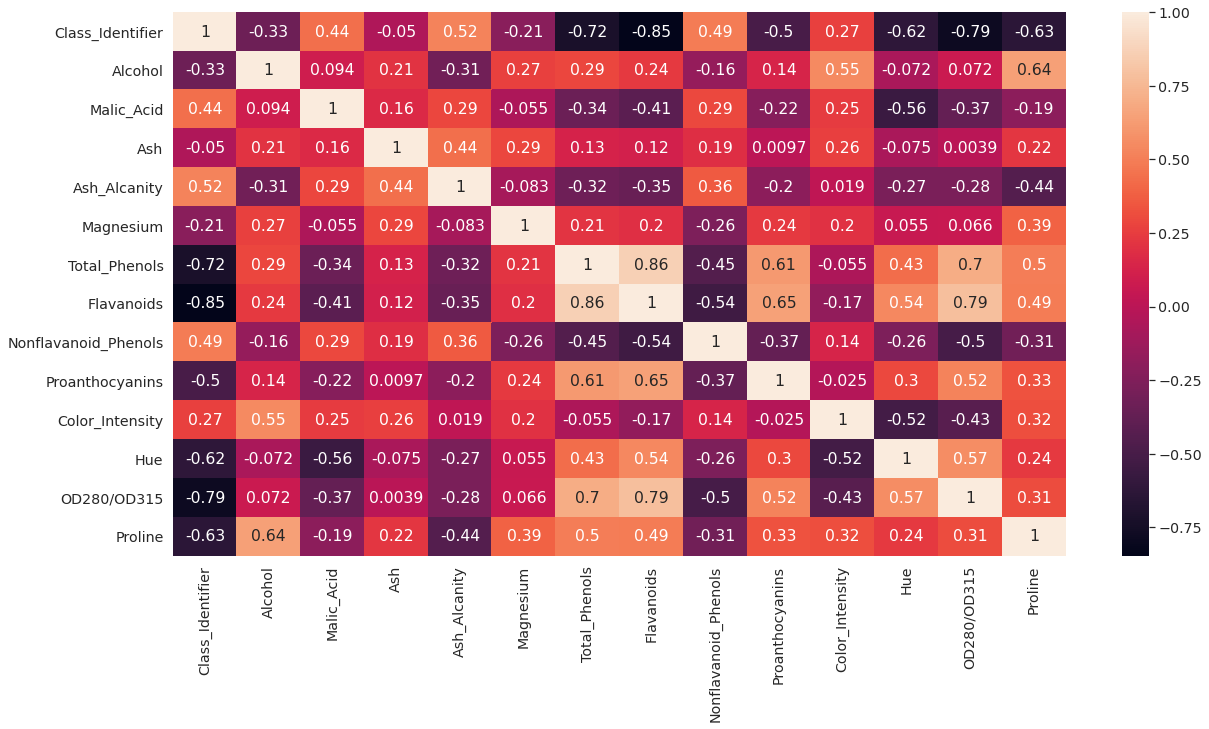

In [ ]:
plt.figure(figsize= (20, 10))
sns.heatmap(data.corr(), color = 'k', annot = True)

In [ ]:
st_scale = StandardScaler()
st_data=data.copy()
st_data[st_data.columns]=st_scale.fit_transform(st_data)

st_data.head()

,Class_Identifier,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280/OD315,Proline
0,-1.213944,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,-1.213944,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,-1.213944,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,-1.213944,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,-1.213944,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [ ]:
inertia = []
for k in range(2,10):
    kmeanModel = cluster.KMeans(n_clusters=k,random_state=17)
    kmeanModel.fit(st_data)
    inertia.append(kmeanModel.inertia_)

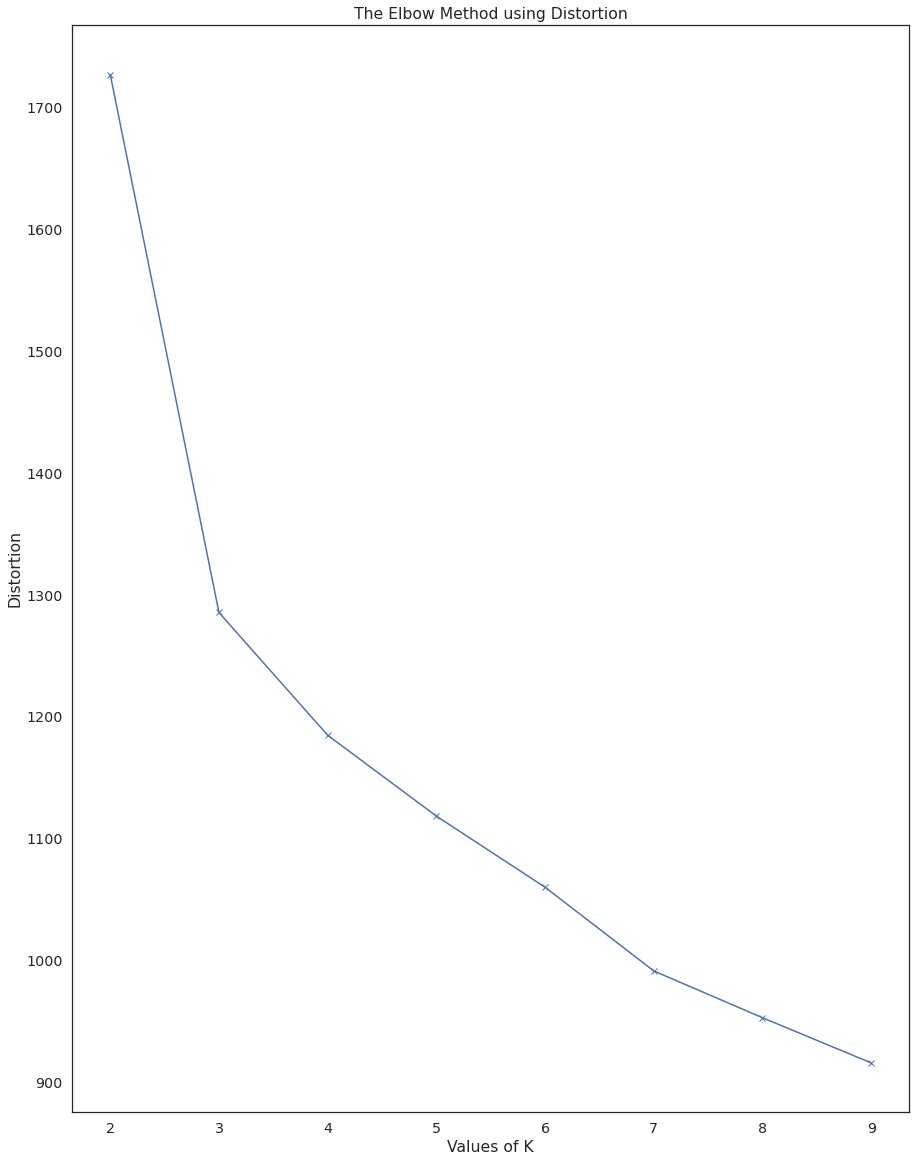

In [ ]:
plt.plot(range(2, 10), inertia, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [ ]:
sil = []

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, 10):
  kmeanModel = KMeans(n_clusters = k)
  kmeanModel.fit(st_data)
  labels = kmeanModel.labels_
  sil.append(silhouette_score(st_data, labels, metric = 'euclidean'))

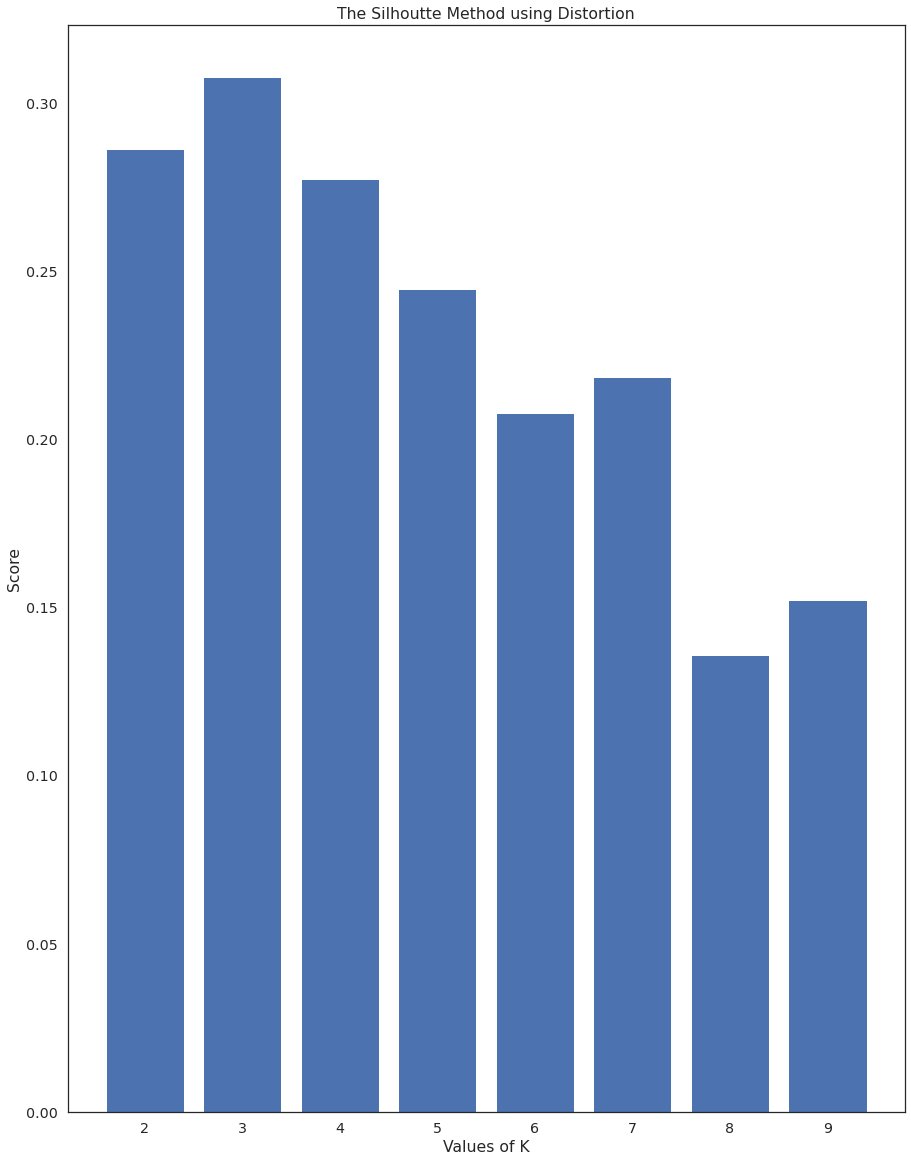

In [ ]:
plt.bar(range(2, 10), sil,)
plt.xlabel('Values of K')
plt.ylabel('Score')
plt.title('The Silhoutte Method using Distortion')
plt.show()

In [ ]:
#Load the data
pca = PCA(2)

#Transform the data
df = pca.fit_transform(st_data)
principalDf = pd.DataFrame(data = df, columns = ['PC 1', 'PC 2'])
principalDf

,PC 1,PC 2
0,-3.522934,-1.453098
1,-2.528858,0.330019
2,-2.785029,-1.036936
3,-3.922588,-2.768210
4,-1.407511,-0.867773
...,...,...
173,3.627996,-2.206617
174,2.942729,-1.752263
175,3.027272,-2.756040
176,2.755222,-2.293784


Implementation of K-means

In [ ]:
def plotCurrent(X, Rnk, Kmus):
    N, D = np.shape(X)
    K = np.shape(Kmus)[0]

    InitColorMat = np.matrix([[1, 0, 0], 
                              [0, 1, 0],   
                              [0, 0, 1],
                              [0, 0, 0],
                              [1, 1, 0], 
                              [1, 0, 1], 
                              [0, 1, 1]])

    KColorMat = InitColorMat[0:K]
    colorVec = Rnk.dot(KColorMat)
    muColorVec = np.eye(K).dot(KColorMat)

    plt.scatter(X[:,0], X[:,1], edgecolors=colorVec, marker='o', facecolors='none', alpha=0.3)
    plt.scatter(Kmus[:,0], Kmus[:,1], c=muColorVec, marker='D', s=50);
    return Rnk

In [ ]:
def calcSqDistances(X, Kmus):

    sqDmat = np.zeros( (len(X), len(Kmus)) )

    for i in range(len(X)):
        sqDmat[i] = (np.linalg.norm(X[i] - Kmus, axis = 1)) ** 2
    return sqDmat
    

In [ ]:
def determineRnk(sqDmat):

    Rnk = np.zeros_like(sqDmat)
    
    for row in range(sqDmat.shape[0]):
        Rnk[row][np.argmin(sqDmat[row, :], axis = 0)] = 1
   
    return Rnk
    

In [ ]:
def recalcMus(X, Rnk):
    new_k_mus = [ X.T.dot(Rnk[:, i])/sum(Rnk[:, i])  for i in range(Rnk.shape[1]) ]
    
    return np.array(new_k_mus)

In [ ]:
def KMeans(K,X):
  X_row = np.shape(X)[0]
  X_col = np.shape(X)[1]

  #empty matrix for mu vectors
  center_means = np.zeros((K, X_col))

  # Initialize random cluster centers
  cul



In [ ]:
def runKMeans(K, X):
    # Shape dimensions of X
    N = np.shape(X)[0]
    D = np.shape(X)[1]

    # empty matrix for mu vectors
    Kmus = np.zeros((K, D))

    # Initialize random cluster centers
    rndinds = np.random.permutation(N)
    Kmus = X[rndinds[:K]]

    # Set max number of iterations
    maxiters = 1000;


    for iter in range(maxiters):
        # sqDmat will be an N-by-K matrix with the n,k entry as specfied above
        sqDmat = calcSqDistances(X, Kmus);
        # R is the "responsibility" matrix
        # R will be an N-by-K matrix of binary values 

        Rnk = determineRnk(sqDmat)
        KmusOld = Kmus
        plotCurrent(X, Rnk, Kmus)
        plt.show()

        # Recalculate mu values based on cluster assignments as per Bishop (9.4)
        Kmus = recalcMus(X, Rnk)

        # Break if cluster centers have converged.
        if sum(abs(KmusOld.flatten() - Kmus.flatten())) < 1e-6:
            return Rnk
            break

    plotCurrent(X,Rnk,Kmus)

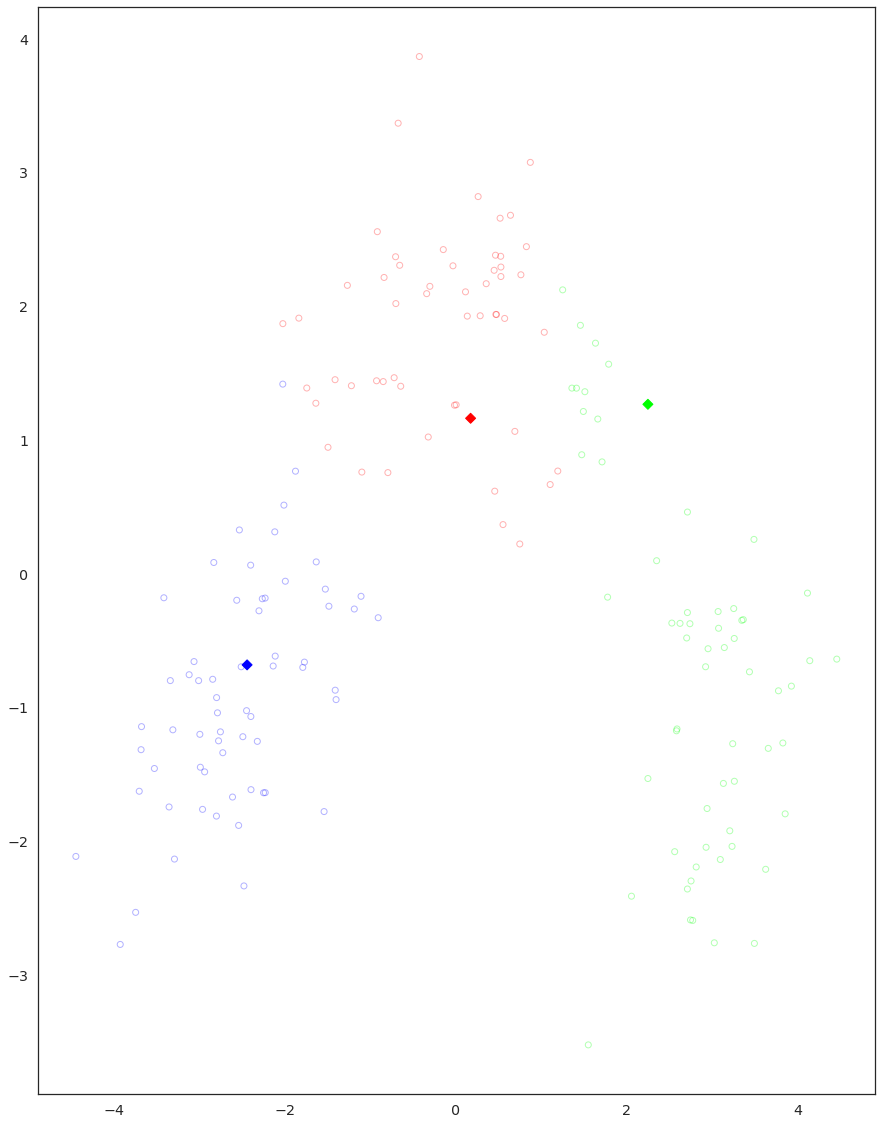

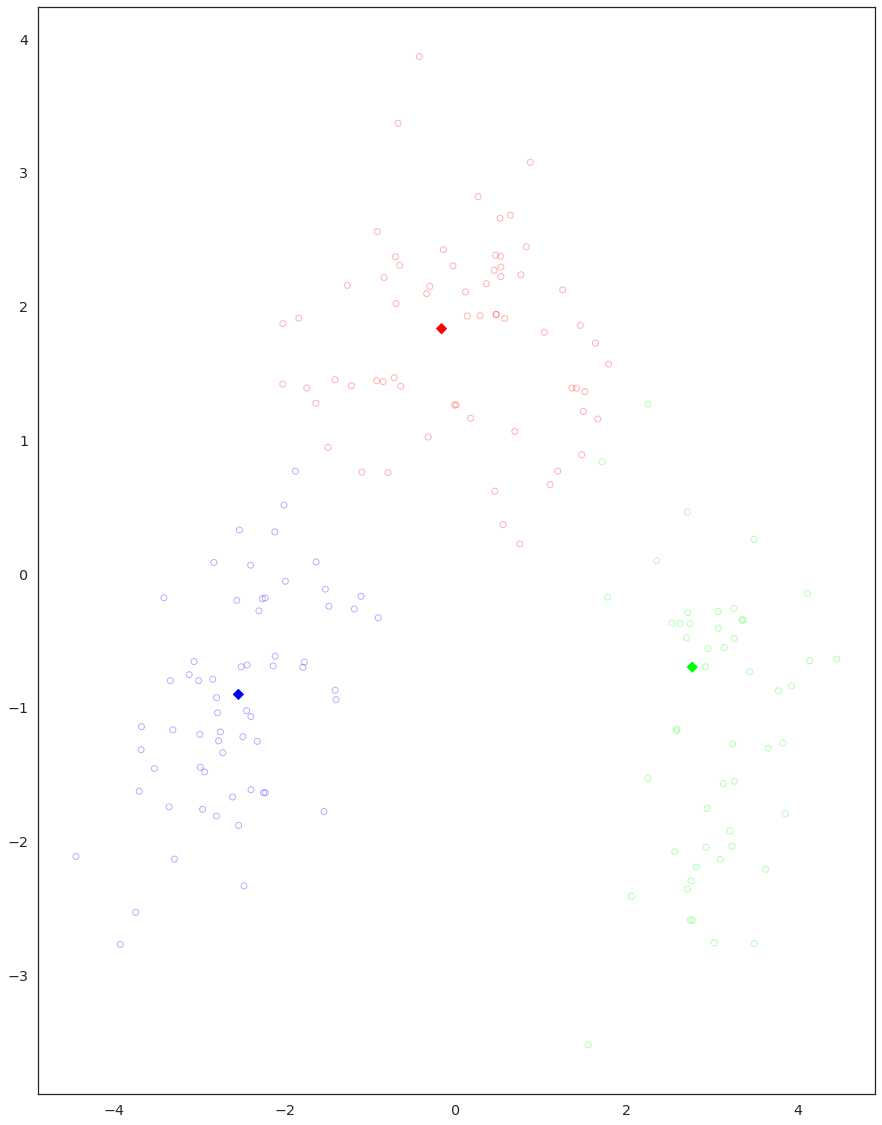

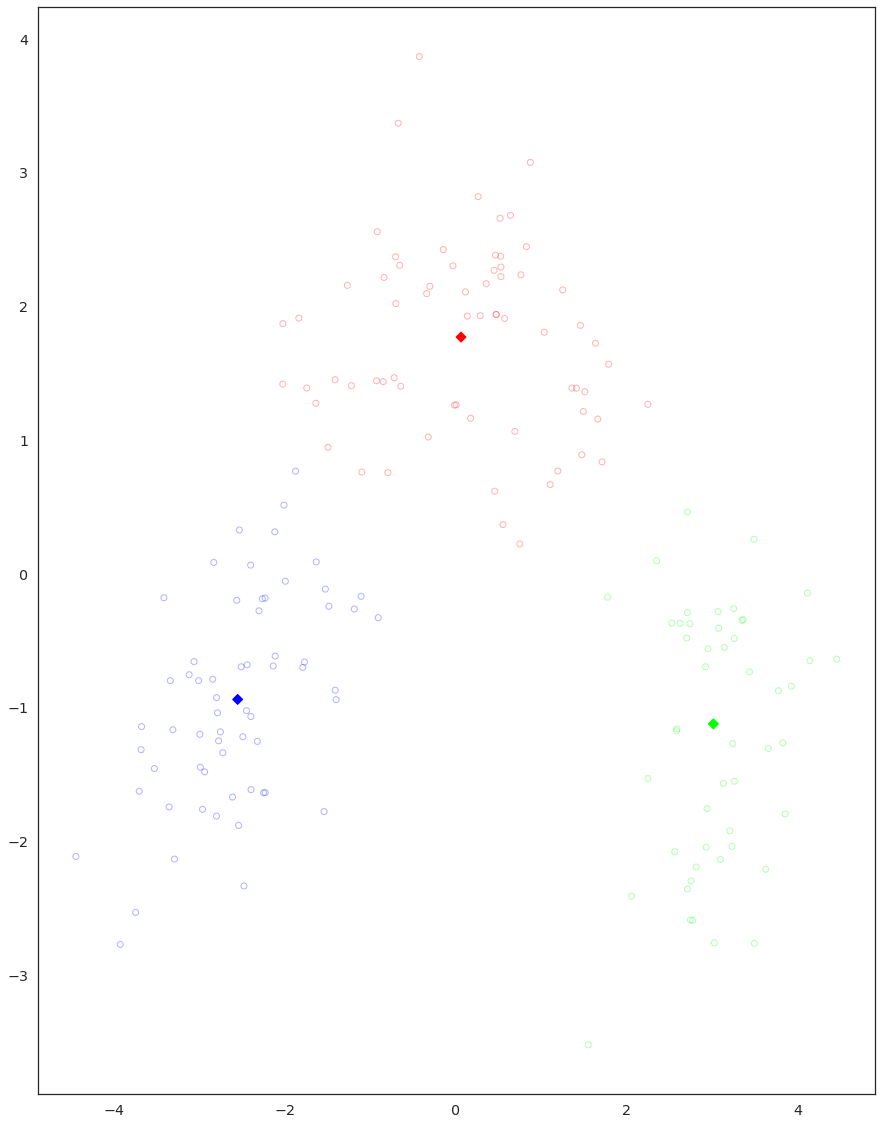

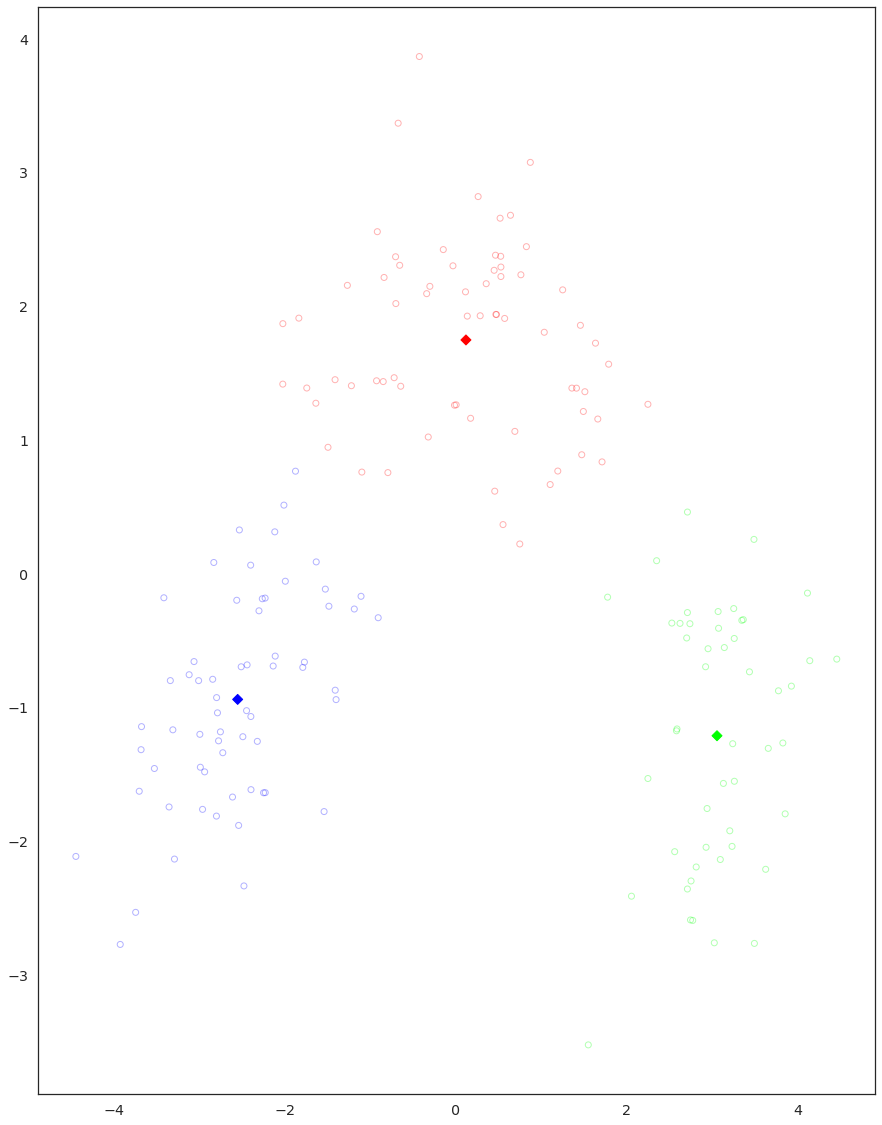

In [ ]:
results = runKMeans(3, df)
results = results[::-1]

In [ ]:
labels = np.array(data['Class_Identifier'])
lab_dict = {}
for lab in np.unique(labels):
  lab_dict[lab] = []
for idx, label in enumerate(labels):
  lab_dict[label].append(idx)

one_class = np.where(results[:60] == 1)[1]
two_class = np.where(results[61:130] == 1)[1]
three_class = np.where(results[130:] == 1)[1]
total_error = 0
for a_class in [one_class, two_class, three_class]:
  total_error += np.count_nonzero(a_class!=stats.mode(a_class)[0])
avg_error = total_error/len(labels)
avg_error

0.14606741573033707

Implementation of Gaussian Mixture Models

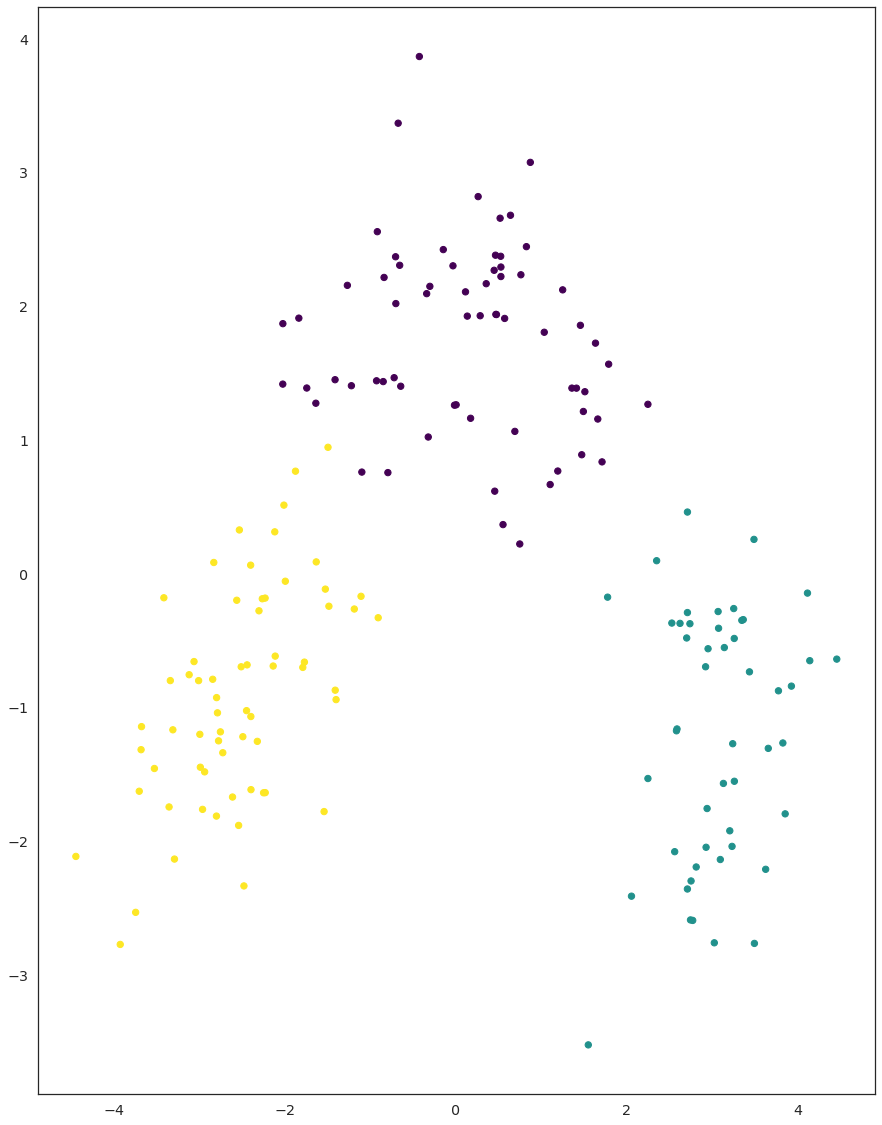

In [ ]:
model = mixture.GaussianMixture(n_components=3, covariance_type='full').fit(df)
labels = model.predict(df)
plt.scatter(df[:, 0], df[:, 1], c=labels, s=40, cmap='viridis')

We then use the predict_proba method to find probabilitic cluster assignments. To visualize this, we make the size of each point proportional to the certainty of prediction. 

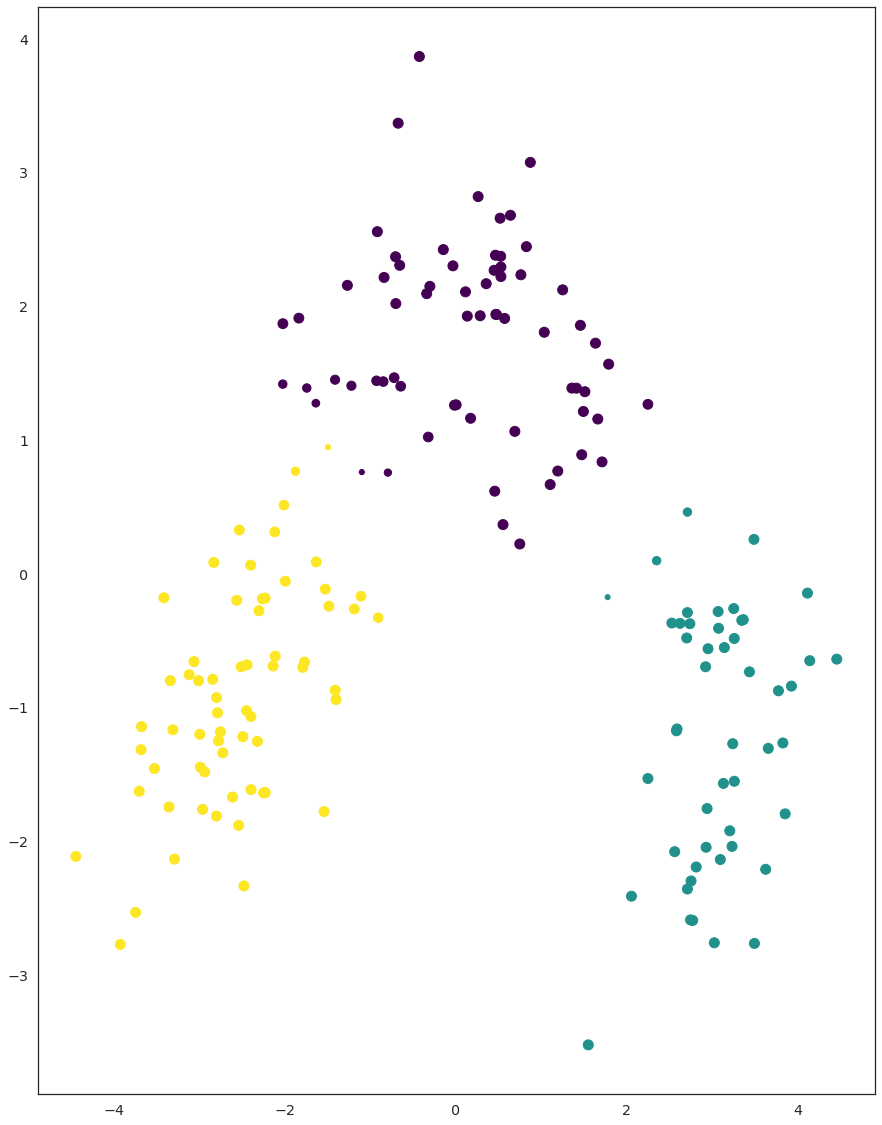

In [ ]:
prob_point = model.predict_proba(df)

# To clearly visualize differenes 
size = 100 * prob_point.max(1) ** 2 
plt.scatter(df[:, 0], df[:, 1], c=labels, cmap='viridis', s=size)

From the above figure, we can see that the points at the boundaries of the clusters are smaller in comparison with the size of the points at the centers of the clusters. This small size reflects the uncertainty of points-to-cluster assignment. We are more certain that the larger points belong to that particular cluster. 